# Metody Numeryczne projekt 3 Jakub Włostowski 171559

## Aproksymacja profilu wysokościowego

### 1. Wstęp 

Tematem tego projektu była aproksymacja profilu wysokościowego danej trasy przy użyciu interpolacji metodą Lagrange'a oraz metody splajnów. Projekt wykonałem przy użyciu języka Python. Użyłem danych trzech różnych tras, które znacząco się od siebie różnią jeśli chodzi o ukształtowanie terenu. Dane przetworzyłem przy użyciu biblioteki pandas, dzięki której pobrałem dane w postaci pliku csv. 

### 2. Metoda Lagrange'a 

Polega ona na stworzeniu wzoru funkcji korzystając z poniższych wzorów:

$$\Phi_i(x) = \prod_{j=1,j\ne i}^{n+1}\frac{(x - x_j)}{(x_i - x_j)}$$

$$F(x) = \sum_{i=1}^{n}y_i\Phi_i(x)$$

Metoda ta jest stabilna i łatwa do implementacji, jednak bardzo często zdarza się, że funkcja mimo tego, że jest dobrze interpolowana w środku przedziału to na krawędziach pojawiają się znaczące oscylacje. Zjawisko to nazwane jest efektem Rungego.

### 3. Metoda splajnów    

Jest to interpolacja funkcjami sklejanymi, lokalna z użyciem wielomianów niskiego stopnia. Polega na odpowiedniej kostrukcji macierzy i jej rozwiązaniu. Wynikiem jest wektor, który zawiera współczynniki funkcji wielomianowych w kolejnych podprzedziałach. Ogólna funkcja składa się z mniejszych kawałków.

### 4.1. Mount Everest 

Funkcja bazowa składa się z 512 par punktów. Jest to trasa o jednym wyraźnym wzniesieniu.

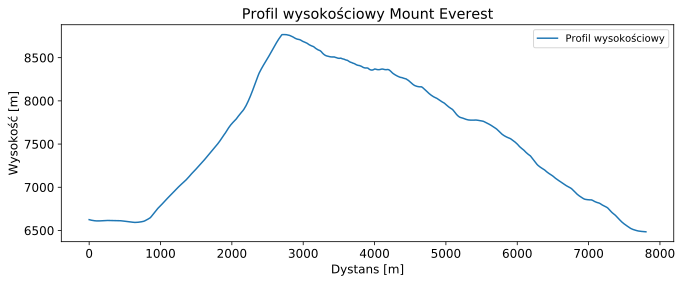

460


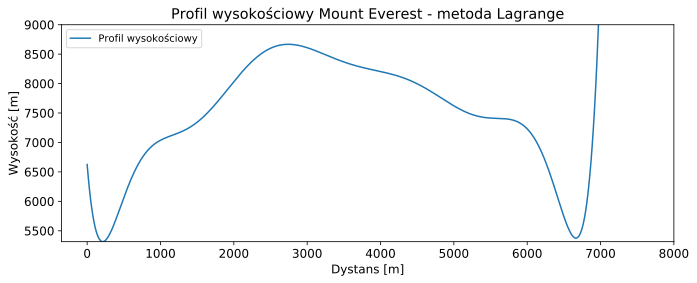

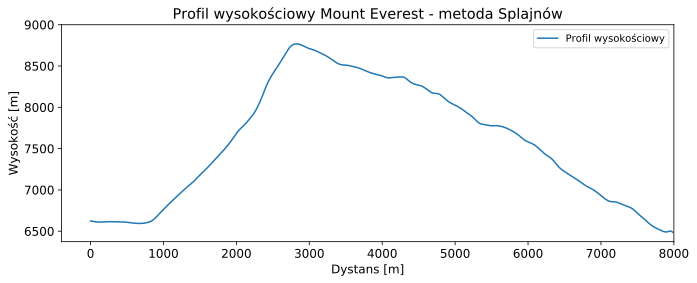

In [5]:
import numpy as np
import pandas as pd
import math as math
from numpy import array


def lagrange(xtest, ytest, x):
    value = 0
    for i in range(len(xtest)):
        phi = ytest[i]
        for j in range(len(xtest)):
            if i != j:
                phi *= (x - xtest[j]) / (xtest[i] - xtest[j])

        value += phi

    return value

def spline(x_data, y_data):
    data_size = len(x_data)
    matrix_size = 2 + (data_size - 2) * 2 + (data_size - 1) * 2
    matrix = np.zeros((matrix_size, matrix_size))
    b = np.zeros(matrix_size)
    i = 0

    for j in range(data_size - 1):
        h = x_data[j + 1] - x_data[j]
        matrix[i][4 * j] = 1
        b[i] = y_data[j]
        i = i + 1
        matrix[i][4 * j] = 1
        matrix[i][4 * j + 1] = h
        matrix[i][4 * j + 2] = h * h
        matrix[i][4 * j + 3] = h * h * h
        b[i] = y_data[j + 1]
        i = i + 1

    for j in range(0, data_size - 2):
        h = x_data[j + 1] - x_data[j]
        matrix[i][4 * j + 1] = 1
        matrix[i][4 * j + 2] = 2 * h
        matrix[i][4 * j + 3] = 3 * h * h
        matrix[i][4 * (j + 1) + 1] = -1

        i = i + 1

        matrix[i][4 * j + 2] = 2
        matrix[i][4 * j + 3] = 6 * h
        matrix[i][4 * (j + 1) + 2] = -2
        i = i + 1

        if j == data_size - 3:
            matrix[i][2] = 1
            matrix[i + 1][4 * (j - 1) + 2] = 2
            matrix[i + 1][4 * (j - 1) + 3] = 6 * h

    x = np.linalg.solve(matrix, b)
    return x

def splineInter(x, vec, x_data):
    for i in range(0, len(x_data) - 1):
        if x >= x_data[i] and x <= x_data[i + 1]:
            value = 0
            for j in range(4):
                value += vec[4 * i + j] * pow(x - x_data[i], j)
            return value



data = pd.read_csv("MountEverest.csv")
x_data = data['Dystans']
y_data = data['Wysokosc']

test_x_data = x_data.tolist()
test_x_data = test_x_data[0::50]

test_y_data = y_data.tolist()
test_y_data = test_y_data[0::50]

lagrange_data = []
iter = math.ceil(max(data.iloc[:, 0]) / 17)

for i in range(0, iter):
    lagrange_data.append(lagrange(test_x_data, test_y_data, i*17))
    
spline_data = []
test_x_data = x_data.tolist()[0::5]
test_y_data = y_data.tolist()[0::5]
x_solve = spline(test_x_data, test_y_data)

for i in range(0, iter):
    spline_data.append(splineInter(i*17, x_solve, test_x_data))
    
    
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('pdf', 'svg')
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (11,4)
plt.rcParams.update({'font.size': 12})
plt.plot(x_data, y_data, label='Profil wysokościowy')
plt.legend(loc='best', fontsize = 10)
plt.title('Profil wysokościowy Mount Everest')
plt.xlabel('Dystans [m]')
plt.ylabel('Wysokość [m]')
plt.show()
print(iter)

plt.rcParams['figure.figsize'] = (11,4)
plt.rcParams.update({'font.size': 12})
plt.plot(x_data[0:iter], lagrange_data, label='Profil wysokościowy')
plt.legend(loc='best', fontsize = 10)
plt.title('Profil wysokościowy Mount Everest - metoda Lagrange')
plt.xlabel('Dystans [m]')
plt.ylabel('Wysokość [m]')
plt.ylim(top=9000)
plt.xlim(right=8000)
plt.ylim(bottom=min(lagrange_data))
plt.show()

x_new_data = np.linspace(0, 8000, len(spline_data)) 

plt.rcParams['figure.figsize'] = (11,4)
plt.rcParams.update({'font.size': 12})
plt.plot(x_new_data, spline_data, label='Profil wysokościowy')
plt.legend(loc='best', fontsize = 10)
plt.title('Profil wysokościowy Mount Everest - metoda Splajnów')
plt.xlabel('Dystans [m]')
plt.ylabel('Wysokość [m]')
plt.ylim(top=9000)
plt.xlim(right=8000)
plt.show()

### 4.2. Trasa o kilku wyraźnych wzniesieniach

Jest to trasa o kilku wyraźnych wzniesieniach terenu.

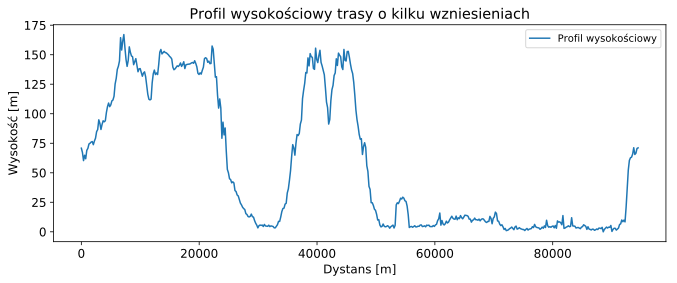

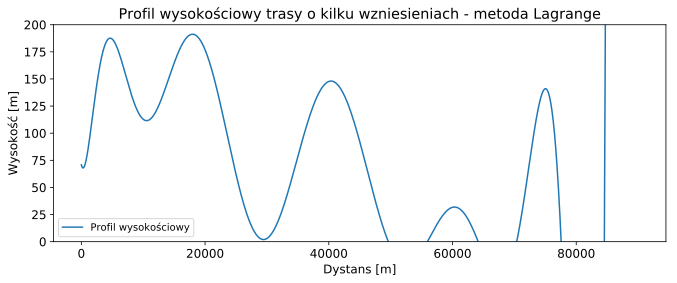

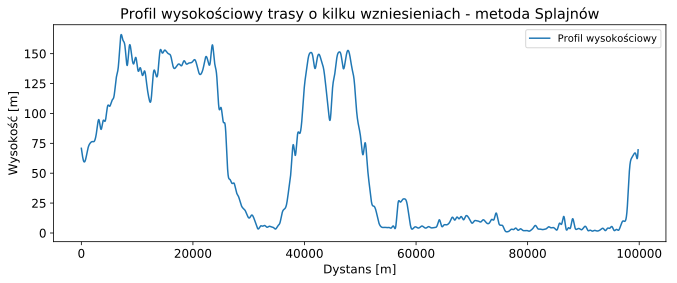

In [11]:
data = pd.read_csv("100.csv")
x_data = data['Dystans']
y_data = data['Wysokosc']

test_x_data = x_data.tolist()[0::40]
test_y_data = y_data.tolist()[0::40]
lagrange_data = []
iter = math.ceil(max(x_data / 17))

for i in range(0, iter):
    lagrange_data.append(lagrange(test_x_data, test_y_data, i*17))
    
plt.rcParams['figure.figsize'] = (11,4)
plt.rcParams.update({'font.size': 12})
plt.plot(x_data, y_data, label='Profil wysokościowy')
plt.legend(loc='best', fontsize = 10)
plt.title('Profil wysokościowy trasy o kilku wzniesieniach')
plt.xlabel('Dystans [m]')
plt.ylabel('Wysokość [m]')
plt.show()

x_new_data = np.linspace(0, 90000, len(lagrange_data)) 

plt.rcParams['figure.figsize'] = (11,4)
plt.rcParams.update({'font.size': 12})
plt.plot(x_new_data, lagrange_data, label='Profil wysokościowy')
plt.legend(loc='best', fontsize = 10)
plt.title('Profil wysokościowy trasy o kilku wzniesieniach - metoda Lagrange')
plt.xlabel('Dystans [m]')
plt.ylabel('Wysokość [m]')
plt.ylim(top=200)
plt.ylim(bottom=0)
plt.show()


spline_data = []
test_x_data = x_data.tolist()[0::2]
test_y_data = y_data.tolist()[0::2]
x_solve = spline(test_x_data, test_y_data)

for i in range(0, iter):
    spline_data.append(splineInter(i*17, x_solve, test_x_data))
    
x_new_data = np.linspace(0, 100000, len(spline_data)) 
    
plt.rcParams['figure.figsize'] = (11,4)
plt.rcParams.update({'font.size': 12})
plt.plot(x_new_data, spline_data, label='Profil wysokościowy')
plt.legend(loc='best', fontsize = 10)
plt.title('Profil wysokościowy trasy o kilku wzniesieniach - metoda Splajnów')
plt.xlabel('Dystans [m]')
plt.ylabel('Wysokość [m]')
plt.show()

### 4.3. Trasa prawie płaska 

Jest to trasa niemalże płaska o bardzo niewielkich różnicach wysokości terenu.

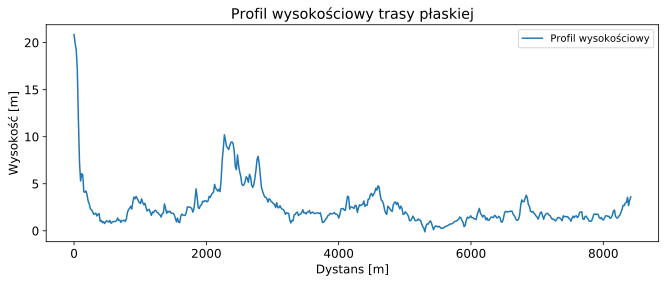

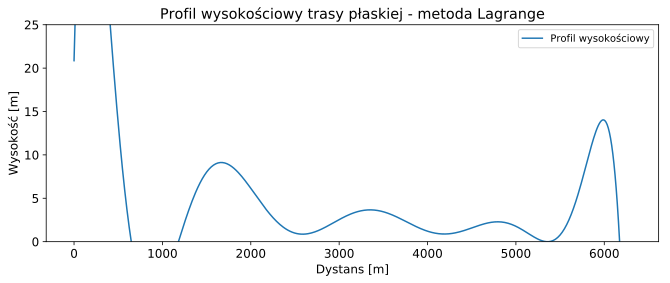

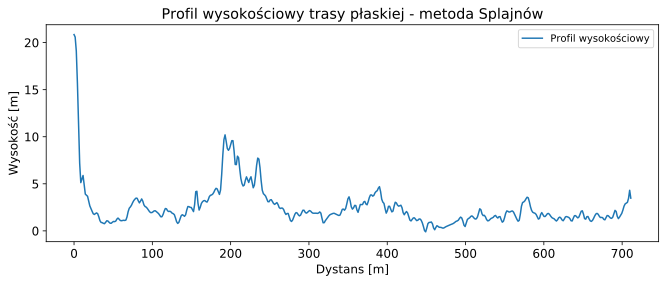

In [3]:
data = pd.read_csv("SpacerniakGdansk.csv")
x_data = data['Dystans']
y_data = data['Wysokosc']

test_x_data = x_data.tolist()[0::2]

test_y_data = y_data.tolist()[0::2]

x_solve = spline(test_x_data, test_y_data)
spline_data = []

for i in range(0, iter):
    spline_data.append(splineInter(i*17, x_solve, test_x_data))
    
test_x_data = x_data.tolist()[0::50]
test_y_data = y_data.tolist()[0::50]
lagrange_data = []
iter = math.ceil(max(x_data / 17))

for i in range(0, iter):
    lagrange_data.append(lagrange(test_x_data, test_y_data, i*17))

plt.rcParams['figure.figsize'] = (11,4)
plt.rcParams.update({'font.size': 12})
plt.plot(x_data, y_data, label='Profil wysokościowy')
plt.legend(loc='best', fontsize = 10)
plt.title('Profil wysokościowy trasy płaskiej')
plt.xlabel('Dystans [m]')
plt.ylabel('Wysokość [m]')
plt.show()

x_new_data = np.linspace(0, 6300, len(lagrange_data)) 

plt.rcParams['figure.figsize'] = (11,4)
plt.rcParams.update({'font.size': 12})
plt.plot(x_new_data, lagrange_data, label='Profil wysokościowy')
plt.legend(loc='best', fontsize = 10)
plt.title('Profil wysokościowy trasy płaskiej - metoda Lagrange')
plt.xlabel('Dystans [m]')
plt.ylabel('Wysokość [m]')
plt.ylim(bottom = 0)
plt.ylim(top = 25)
plt.show()

x_new_data = np.linspace(0, 8000, len(spline_data)) 

plt.rcParams['figure.figsize'] = (11,4)
plt.rcParams.update({'font.size': 12})
plt.plot(x_new_data, spline_data, label='Profil wysokościowy')
plt.legend(loc='best', fontsize = 10)
plt.title('Profil wysokościowy trasy płaskiej - metoda Splajnów')
plt.xlabel('Dystans [m]')
plt.ylabel('Wysokość [m]')
plt.show()

### 5. Wpływ różnych aspektów na działanie obu metod interpolacyjnych 

Działanie metody Lagrange'a oraz metody Splajnów zależy od wielu różnych czynników m.in. liczby punktów węzłowych, ich rozmieszczeniu, czy wpływu charakteru trasy na wyniki.

### 5.1. Wpływ liczby punktów węzłowych na wyniki 

Testowaną trasą jest wejście na Mount Everest.

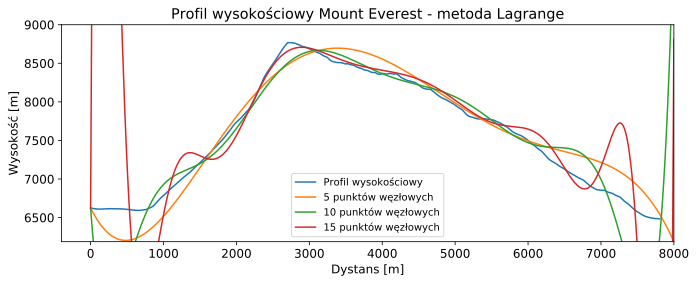

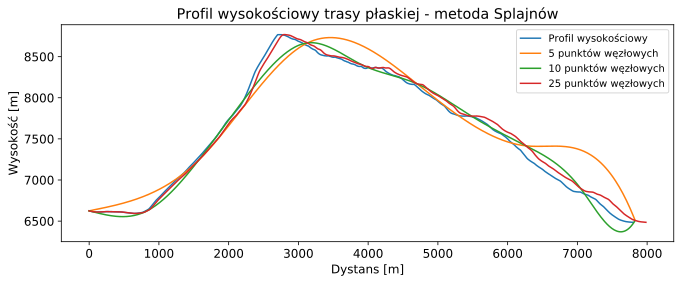

In [4]:
data = pd.read_csv("MountEverest.csv")
x_data = data['Dystans']
y_data = data['Wysokosc']
iter = math.ceil(max(data.iloc[:, 0]) / 17)

test_x_data1 = x_data.tolist()[0::100]# 5
test_y_data1 = y_data.tolist()[0::100]
test_x_data2 = x_data.tolist()[0::50] # 10
test_y_data2 = y_data.tolist()[0::50]
test_x_data3 = x_data.tolist()[0::34] #15
test_y_data3 = y_data.tolist()[0::34]
test_x_data4 = x_data.tolist()[0::2] #25
test_y_data4 = y_data.tolist()[0::2]
lagrange_data1 = []
lagrange_data2 = []
lagrange_data3 = []

for i in range(0, iter):
    lagrange_data1.append(lagrange(test_x_data1, test_y_data1, i*17))
for i in range(0, iter):
    lagrange_data2.append(lagrange(test_x_data2, test_y_data2, i*17))
for i in range(0, iter):
    lagrange_data3.append(lagrange(test_x_data3, test_y_data3, i*17))
    
x_new_data1 = np.linspace(0, 8000, len(lagrange_data1)) 
x_new_data2 = np.linspace(0, 8000, len(lagrange_data2)) 
x_new_data3 = np.linspace(0, 8000, len(lagrange_data3))     

    
plt.rcParams['figure.figsize'] = (11,4)
plt.rcParams.update({'font.size': 12})
plt.plot(x_data, y_data, label='Profil wysokościowy')
plt.plot(x_new_data1, lagrange_data1, label='5 punktów węzłowych')
plt.plot(x_new_data2, lagrange_data2, label='10 punktów węzłowych')
plt.plot(x_new_data3, lagrange_data3, label='15 punktów węzłowych')
plt.legend(loc='best', fontsize = 10)
plt.title('Profil wysokościowy Mount Everest - metoda Lagrange')
plt.xlabel('Dystans [m]')
plt.ylabel('Wysokość [m]')
plt.ylim(top=9000)
plt.xlim(right=8000)
plt.ylim(bottom=min(lagrange_data1))
plt.show()

x_solve1 = spline(test_x_data1,test_y_data1)
x_solve2 = spline(test_x_data2,test_y_data2)
x_solve4 = spline(test_x_data4,test_y_data4)
spline_data1 = []
spline_data2 = []
spline_data4 = []

for i in range(0, iter):
    spline_data1.append(splineInter(i*17, x_solve1, test_x_data1))
for i in range(0, iter):
    spline_data2.append(splineInter(i*17, x_solve2, test_x_data2))
for i in range(0, iter):
    spline_data4.append(splineInter(i*17, x_solve4, test_x_data4))
    
x_new_data1 = np.linspace(0, 8000, len(spline_data1)) 
x_new_data2 = np.linspace(0, 8000, len(spline_data2)) 
x_new_data4 = np.linspace(0, 8000, len(spline_data4)) 


plt.rcParams['figure.figsize'] = (11,4)
plt.rcParams.update({'font.size': 12})
plt.plot(x_data, y_data, label='Profil wysokościowy')
plt.plot(x_new_data1, spline_data1, label='5 punktów węzłowych')
plt.plot(x_new_data2, spline_data2, label='10 punktów węzłowych')
plt.plot(x_new_data4, spline_data4, label='25 punktów węzłowych')
plt.legend(loc='best', fontsize = 10)
plt.title('Profil wysokościowy trasy płaskiej - metoda Splajnów')
plt.xlabel('Dystans [m]')
plt.ylabel('Wysokość [m]')
plt.show()
    

W metodzie Lagrange'a im więcej punktów węzłowych tym mniej dokładny jest wynik interpolacji. Pojawia się coraz większy efekt Rungego na krańcach przedziału, czyli oscylacja. Jeżeli chodzi o metodę Splajnów wniosek jest odwrotny. Im więcej punktów węzłowych tym bardziej wynik jest dokładny i przybliżony do oryginalnego profilu wysokościowego.

### 5.2. Wpływ rozmieszczenia punktów węzłowych na wyniki 

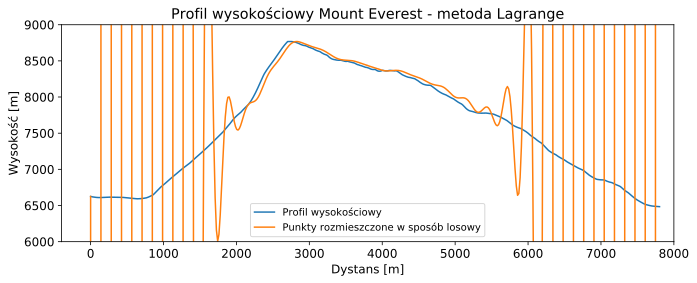

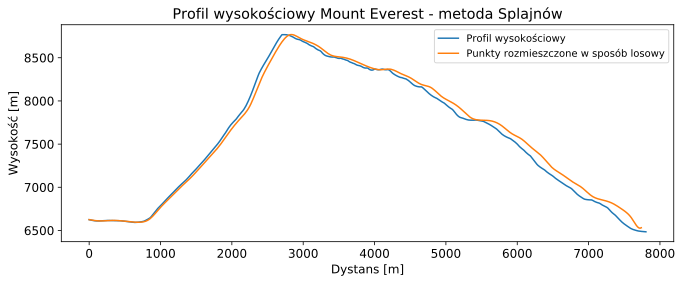

In [72]:
import random
data = pd.read_csv("MountEverest.csv")
x_data = data['Dystans']
y_data = data['Wysokosc']
iter1 = math.ceil(max(data.iloc[:, 0]) / 17)

xd = []
yd = []
rd = []
lagrange_data1 = []
r = random.randint(1, 60)
for i in range(0, 500, r):
    r = random.randint(1, 60)
    xd.append(x_data[i])
    yd.append(y_data[i])
    rd.append(r)
    
for i in range(0, iter1):
    lagrange_data1.append(lagrange(xd, yd, i*17))
    
x_new_data1 = np.linspace(0, 8000, len(lagrange_data1)) 
    
plt.rcParams['figure.figsize'] = (11,4)
plt.rcParams.update({'font.size': 12})
plt.plot(x_data, y_data, label='Profil wysokościowy')
plt.plot(x_new_data1, lagrange_data1, label='Punkty rozmieszczone w sposób losowy')
plt.legend(loc='best', fontsize = 10)
plt.title('Profil wysokościowy Mount Everest - metoda Lagrange')
plt.xlabel('Dystans [m]')
plt.ylabel('Wysokość [m]')
plt.ylim(top=9000)
plt.xlim(right=8000)
plt.ylim(bottom=6000)
plt.show()

x_solve = spline(xd,yd)
spline_data = []

for i in range(0, iter1):
    spline_data.append(splineInter(i*17, x_solve, xd))
    
plt.rcParams['figure.figsize'] = (11,4)
plt.rcParams.update({'font.size': 12})
plt.plot(x_data, y_data, label='Profil wysokościowy')
plt.plot(x_new_data1, spline_data, label='Punkty rozmieszczone w sposób losowy')
plt.legend(loc='best', fontsize = 10)
plt.title('Profil wysokościowy Mount Everest - metoda Splajnów')
plt.xlabel('Dystans [m]')
plt.ylabel('Wysokość [m]')
plt.show()

W przypadku, gdy punkty są rozmieszczone w losowych odległościach od siebie metoda Lagrange'a działa lepiej niż w przypadku równoodległych punktów.

### 5.3. Wpływ charakteru trasy na wyniki 

W trakcie sporządzania projektu testowałem 3 różne pod względem charakteru trasy. Metoda Lagrange'a zdaje się działać lepiej dla tras o jednym wyraźnym wzniesieniu lub tras bardzo płaskich. W przypadku, gdy trasa ma wiele wzniesień i spadków metoda ta działa znacznie gorzej. W przypadku metody Splajnów charakter trasy zdaje się nie mieć wpływu na wyniki.

### 6. Ogólne wnioski 

Metoda Splajnów okazała się znacznie bardziej dokładna od metody Lagrange'a. Występujące w niej oscylacje nie są aż tak widzoczne i dokuczliwe jak przy metodzie Lagrange'a. Jest to spowodowane podziałem danych na mniejsze podprzedziały. Największy wpływ na poprawne działanie metody Splajnów ma ilość punktów węzłowych wybranych do interpolacji. Przy doborze odpowiedniej ilości takich punktów jesteśmy w stanie naprawdę dokładnie odwzorować oryginalną funkcję. Według mnie metoda Splajnów może być naprawdę przydatna w wielu aspektach życia codziennego takich jak tworzenie tras dla kolarzy. Metoda Lagrange'a natomiast wydaje się bardzo niedokładna i zawodna chociaż działa lepiej, gdy punkty są w losowych odstępach od siebie.